In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/.kaggle2"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [1]:
%cd /content/drive/My Drive/.kaggle2

/content/drive/My Drive/.kaggle2


In [0]:
!kaggle competitions download -c data-science-bowl-2018

  0% 0.00/2.67M [00:00<?, ?B/s]
100% 2.67M/2.67M [00:00<00:00, 43.7MB/s]
100% 2.62k/2.62k [00:00<00:00, 21.7kB/s]

  0% 0.00/112k [00:00<?, ?B/s]
100% 112k/112k [00:00<00:00, 15.5MB/s]
 97% 269M/276M [00:03<00:00, 51.4MB/s]
100% 276M/276M [00:03<00:00, 73.3MB/s]
 55% 5.00M/9.10M [00:00<00:00, 17.9MB/s]
100% 9.10M/9.10M [00:00<00:00, 27.9MB/s]
 92% 73.0M/79.1M [00:01<00:00, 42.8MB/s]
100% 79.1M/79.1M [00:01<00:00, 49.7MB/s]
  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 55.1MB/s]


In [0]:
!unzip stage1_test.zip

In [0]:
from zipfile import ZipFile

In [0]:
os.mkdir('test') 

In [0]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('stage1_test.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('test')

In [0]:
os.mkdir('train') 

In [0]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('stage1_train.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('train')

In [4]:
print('test_data',len(os.listdir('test')))
print('train_data',len(os.listdir('train')))

test_data 65
train_data 670


In [14]:
os.listdir('train')[1]

'4e07a653352b30bb95b60ebc6c57afbc7215716224af731c51ff8d430788cd40'

In [15]:
os.listdir('train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1')

['images', 'masks']

In [7]:
os.listdir('train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/masks')

['1811379154b848c048f574745ed49e5dad19125e1a8c31b92ed2ee643ba04011.png',
 '1c6f75a6b05988e48aacfde653b785a1885cb9b7b5f01657886416f111a522a4.png',
 '210ba35e59ee02e49cb7b15b6a7dc3a9a049eca1e52aede971b2ff83486241ab.png',
 '23947be0224e633947e9a3935d8ecf89be3eb56f68f30db85c74d4bf07d3028b.png',
 '2a709842ce867d9b27281f9d8bec4968b88805afdff3de2ed0c8156f711483cd.png',
 '41394081f8a55f53c47a8117d3f3524dffffe5891f28f1b55ce106bb4e4cd911.png',
 '442b43870e60dc67272355188096416306b1a9352228366eb0582f2a9134e6be.png',
 '4548f1de76bfbecf24b55724643c33e3d85bf0889a6bdb80e77874932e046b6e.png',
 '4aa25a48447702ae8954b3e7fae2d14d3660f46c00f245290ecc517cbe50f935.png',
 '4d4c89112d85d6b85a6c033e891e8e55e77a8a24cf4915e4a317e1f1a89196f3.png',
 '4d9a04f8cc0f45b423718132e1e4a1c2152c9bd0e8f4e0d1af1170145e84030b.png',
 '61a45ead18675ddaf4b70219d0647fd332c18e8e3c734c2e918d98896c88c93d.png',
 '628b1b59482f129bd65a7d96e7b41894695570387d75a35d27a9e9546d97e223.png',
 '729061c3748fd20fa42d4e5ebbc2659f2572e207be3b07341

In [8]:
os.listdir('train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/images')

['003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1.png']

In [9]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import resize

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [0]:
height=224
width=224
channels=3
i=0
X_test=np.zeros((len(os.listdir('test')),width,height,3),dtype='float32')
for folder in os.listdir('test'):
  img_path=os.path.join('test/'+folder)
  for images in os.listdir(img_path):
    path=os.path.join(img_path+'/'+images)
    img=cv2.imread(os.path.join(path+'/'+os.listdir(path)[0]))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(height,width))
    img=np.array(img)
    X_test[i]=img/255
   

In [18]:
X_test.shape

(65, 224, 224, 3)

In [0]:
i=0
X_train=np.zeros((len(os.listdir('train')),width,height,3),dtype='float32')
for folder in os.listdir('train'):
  img_path=os.path.join('train/'+folder)
  path=os.path.join(img_path+'/'+'images')
  img=cv2.imread(os.path.join(path+'/'+os.listdir(path)[0]))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(height,width))
  img=np.array(img)
  X_train[i]=img/255
  

In [20]:
X_train.shape

(670, 224, 224, 3)

In [21]:
os.listdir(img_path+'/masks')

['05a02fb945ee2902473a5c513388870ede95f2aa0240b14a19b1a59e5e165198.png',
 '199428c879e95e94a66c89a19d2fb14f0dcca1c689a383df952f8d85ce44ab1e.png',
 '2456345c265f38d733cd83608d320e1f4ed4276bdba74714172b4abadd24a427.png',
 '33ae086d6052f791f6e9660ec39c242faa631f67f783de76bd11a67992599e8e.png',
 '4ca14e8f8448b5915cb3be13548c85b29c2fb8fa68d547602a59a67a67df05b1.png',
 '698863c20f428007fc8a8606c83e622fdfe8915fbde760f45b5c993dd4349d36.png',
 '888d0e8ae78dda5201ea006611feb306f0c06d058ab25d5294796b9ddbc8d90f.png',
 '93389f8f8383602bf90abe3985ade7262127064b59909c5120e3f7bc9d0f9be2.png',
 '94d4d5ef12db32d6d3d319055c42ab39b020504662ca5769a0075e7a82f21d3a.png',
 'b93b7401714ff17876fc1e38896b5078e674a1fcd157b173204096596f0587a9.png',
 'c5260970c8a6662a4069bd16ff3dce6156da7a9739a937fe3f028888e38eec4d.png',
 'e11a3ba91ca268ebdf3abc3f88b1bfdfdf5c1f4c949fbd9669b354cdeea5f568.png',
 'e4cff39c136de6df7468563906e0f23ee2533d5156fed9016eb51c592762502b.png',
 'ebc1239e69d356f7cd4daf89c440a1523351e30bfce7c8591

In [0]:
print('hello')
i=0
Y_train=np.zeros((len(os.listdir('train')),width,height,1),dtype='float32')
i=0
for folder in os.listdir('train'):
  mask = np.zeros((height, width, 1), dtype=np.bool)
  img_path=os.path.join('train/'+folder)
  path=os.path.join(img_path+'/'+'masks')
  for masks in os.listdir(path):
    final=os.path.join(path+'/'+masks)
    mask_ = imread(final)
    mask_ = np.expand_dims(resize(mask_, (height, width), mode='constant', 
                                      preserve_range=True), axis=-1)
    mask = np.maximum(mask, mask_)
  Y_train[i]=mask
  

In [26]:
Y_train.shape

(670, 224, 224, 1)

In [0]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [0]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [0]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

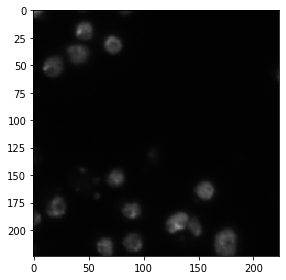

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


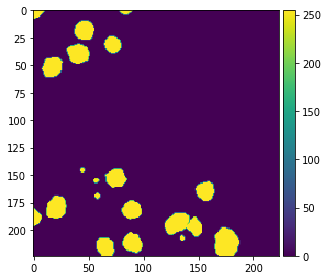

In [47]:
ix = 21
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()

In [34]:
input_img = Input((height, width, channels), name='img')
model1 = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model1.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 224, 224, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 224, 224, 16) 64          conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 224, 224, 16) 0           batch_normalization_20[0][0]     
____________________________________________________________________________________________

In [32]:

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

history = model.fit(X_train1, Y_train1, epochs=25, batch_size=16, validation_data=(X_test1, Y_test1),callbacks=callbacks)

Train on 536 samples, validate on 134 samples
Epoch 1/25
536/536 [==============================] - 22s 41ms/step - loss: -105.6645 - accuracy: 0.6661 - val_loss: -37.5484 - val_accuracy: 0.7589

Epoch 00001: val_loss improved from inf to -37.54837, saving model to model1.h5
Epoch 2/25
536/536 [==============================] - 11s 20ms/step - loss: -196.9412 - accuracy: 0.7382 - val_loss: -17.5653 - val_accuracy: 0.8056

Epoch 00002: val_loss did not improve from -37.54837
Epoch 3/25
536/536 [==============================] - 11s 20ms/step - loss: -239.6207 - accuracy: 0.7444 - val_loss: -34.1626 - val_accuracy: 0.8026

Epoch 00003: val_loss did not improve from -37.54837
Epoch 4/25
536/536 [==============================] - 11s 20ms/step - loss: -276.7706 - accuracy: 0.7360 - val_loss: -33.9210 - val_accuracy: 0.8124

Epoch 00004: val_loss did not improve from -37.54837
Epoch 5/25
536/536 [==============================] - 11s 20ms/step - loss: -315.6660 - accuracy: 0.7123 - val_loss

In [35]:

history = model1.fit(X_train1, Y_train1, epochs=5, batch_size=32, validation_data=(X_test1, Y_test1),callbacks=callbacks)

Train on 536 samples, validate on 134 samples
Epoch 1/5
536/536 [==============================] - 13s 24ms/step - loss: -100.4256 - accuracy: 0.5016 - val_loss: 3.7305 - val_accuracy: 0.1435

Epoch 00001: val_loss did not improve from -2219.65880
Epoch 2/5
536/536 [==============================] - 10s 20ms/step - loss: -210.3174 - accuracy: 0.7145 - val_loss: 1.0007 - val_accuracy: 0.6939

Epoch 00002: val_loss did not improve from -2219.65880
Epoch 3/5
536/536 [==============================] - 10s 19ms/step - loss: -254.7028 - accuracy: 0.7422 - val_loss: 10.3465 - val_accuracy: 0.8070

Epoch 00003: val_loss did not improve from -2219.65880
Epoch 4/5
536/536 [==============================] - 10s 19ms/step - loss: -289.3543 - accuracy: 0.7378 - val_loss: -83.4674 - val_accuracy: 0.7294

Epoch 00004: val_loss did not improve from -2219.65880
Epoch 5/5
536/536 [==============================] - 10s 19ms/step - loss: -324.0899 - accuracy: 0.7380 - val_loss: -24.7267 - val_accuracy: 0.

In [38]:
# Predict on train, val and test
preds_train = model1.predict(X_train1, verbose=1)
preds_val = model1.predict(X_test1, verbose=1)
preds_test = model1.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


65/65 [==============================] - 1s 9ms/step


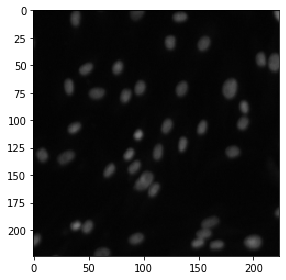

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


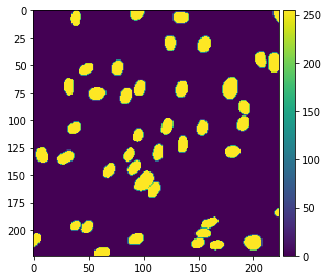

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


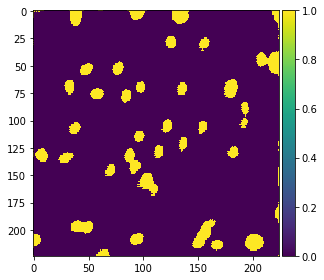

In [43]:
ix = 121
imshow(X_train1[ix])
plt.show()
imshow(np.squeeze(Y_train1[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

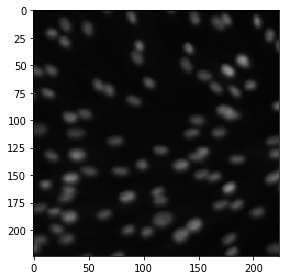

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


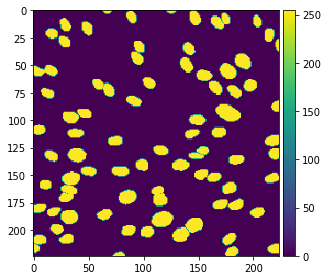

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


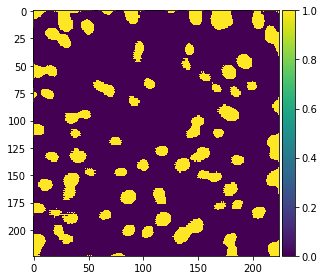

In [40]:
ix = 3
imshow(X_train1[ix])
plt.show()
imshow(np.squeeze(Y_train1[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

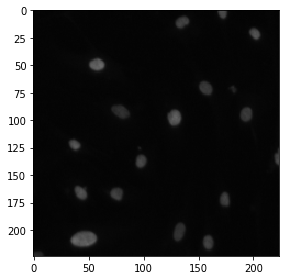

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


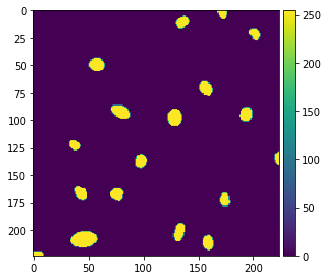

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


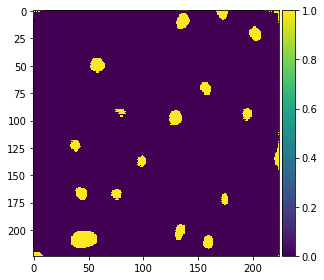

In [42]:
ix = 21
imshow(X_test1[ix])
plt.show()
imshow(np.squeeze(Y_test1[ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()